2. a) Creation of a Line graph with 10 nodes

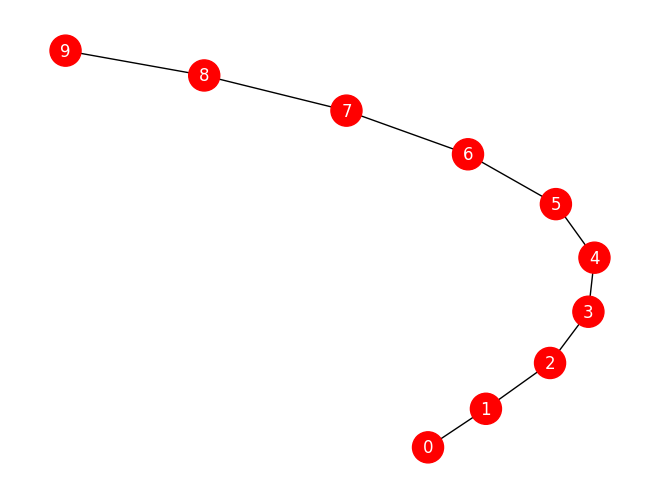

In [139]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random as rn

# Create an undirected line graph with 10 nodes
G = nx.path_graph(10)

#Possible colors= (red,green)
C=['red','green']
#At the beginning all the nodes are red
nx.set_node_attributes(G, C[0], 'state')

# Initialize weights
for u, v in G.edges():
    G[u][v]['weight'] = 1

colors= [G.nodes[node]["state"] for node in G.nodes]

# Draw the graph
nx.draw(G, with_labels=True, node_color=colors, node_size=500, font_color='white')
plt.show()


In [140]:
#Time to wake up is randomly and discrete
t=100

def cost(s, X_j):
        
        #calculate the cost
        #What is the cost of remain at the same color that the neighbor? 

        if X_j==s: 
            cost=1
        else: 
            cost=0 
        
        return cost

def probabilities(n, i,a,C):
     numerator= np.exp(-n*sum(G[i][j]['weight']*cost(a, G.nodes[j]['state']) for j in G.neighbors(i)))
     denominator= sum(np.exp(-n*sum(G[i][j]['weight']*cost(s, G.nodes[j]["state"]) for j in G.neighbors(i))) for s in C)
     return numerator/denominator
     
#Calculate the utility
def utility(G):
    return 1/2*sum(G[i][j]["weight"]*cost(G.nodes[i]["state"], G.nodes[j]["state"]) for i,j in G.edges())

def coloring(t): 
    n=t+1/50
    U=[]

    for i in range(1,t+1): 
        #Choose a random node
        node=rn.choice(list(G.nodes))
        print("The chosen node is ", node, "with color ", G.nodes[node]["state"])

        #Calculate the probabilities
        p_red = probabilities(n, node, C[0],C)
        p_green = probabilities(n, node, C[1],C)

        #Choose the biggest probability and update the color
        if p_red>p_green:
            G.nodes[node]["state"]=C[0]
        else: 
            G.nodes[node]["state"]=C[1]

        print(" The node ", node, " is now", G.nodes[node]["state"])

        U.append(utility(G))

    # Plot the potential function over time
    plt.plot(range(1, t + 1), U)
    plt.xlabel('Time step')
    plt.ylabel('Potential function U(t)')
    plt.title('Potential function over time')
    plt.show()
          

The chosen node is  7 with color  red
 The node  7  is now green
The chosen node is  7 with color  green
 The node  7  is now green
The chosen node is  5 with color  red
 The node  5  is now green
The chosen node is  9 with color  red
 The node  9  is now green
The chosen node is  9 with color  green
 The node  9  is now green
The chosen node is  9 with color  green
 The node  9  is now green
The chosen node is  4 with color  red
 The node  4  is now green
The chosen node is  3 with color  red
 The node  3  is now green
The chosen node is  8 with color  red
 The node  8  is now red
The chosen node is  6 with color  red
 The node  6  is now red
The chosen node is  8 with color  red
 The node  8  is now red
The chosen node is  4 with color  green
 The node  4  is now red
The chosen node is  5 with color  green
 The node  5  is now green
The chosen node is  0 with color  red
 The node  0  is now green
The chosen node is  2 with color  red
 The node  2  is now green
The chosen node is  3 w

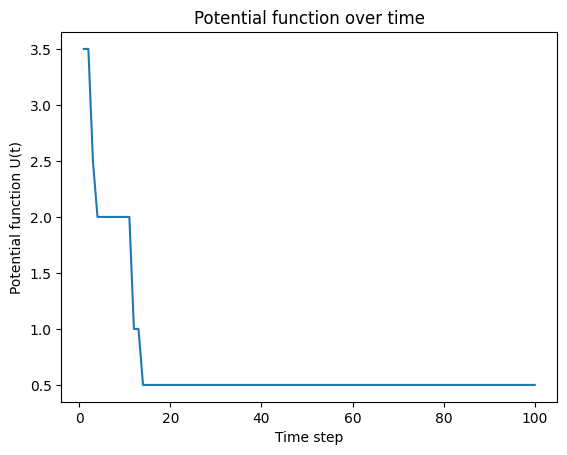

In [141]:
coloring(100)

The potential function is directly proportional to the cost of remaining the same color as a neighbor. As the nodes update their colors at each step of the simulation to ensure that all neighbors have different colors, the utility function, which measures how similar the colors of the neighbors are, tends to decrease.

['green', 'red', 'green', 'green', 'red', 'green', 'red', 'green', 'red', 'green']


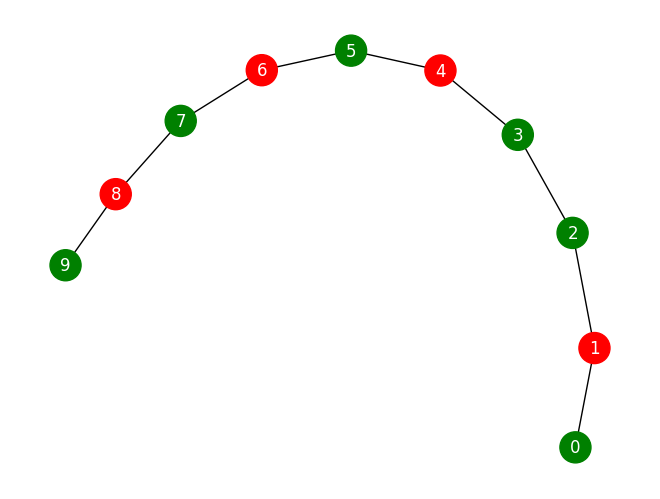

In [142]:
colors= [G.nodes[node]["state"] for node in G.nodes]
print(colors)
# Draw the graph
nx.draw(G, with_labels=True, node_color=colors, node_size=500, font_color='white')
plt.show()

2. b) Routers

In [143]:
from scipy.io import loadmat
import scipy.io

In [144]:
adjency_matrix= loadmat('wifi.mat')
adjency_matrix=adjency_matrix["wifi"]

In [145]:
adjency_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [146]:
routers_coordinates= loadmat("coords.mat")
routers_coordinates=routers_coordinates['coords']

In [147]:
routers_coordinates

array([[0.34888796, 0.81307005],
       [0.75063211, 0.38038771],
       [0.78818735, 0.04624025],
       [0.80621182, 0.64056394],
       [0.00505843, 0.7431052 ],
       [0.95839369, 0.15886282],
       [0.6947375 , 0.81778261],
       [0.71211727, 0.07591448],
       [0.7102648 , 0.33903334],
       [0.43885267, 0.46587037],
       [0.98266215, 0.24169242],
       [0.99600785, 0.09093217],
       [0.29455854, 0.63840565],
       [0.77145444, 0.32313177],
       [0.62042212, 0.15423115],
       [0.24502331, 0.90430393],
       [0.11392656, 0.79326708],
       [0.01278799, 0.49282909],
       [0.46522384, 0.57174431],
       [0.96155569, 0.0780973 ],
       [0.43239753, 0.84449704],
       [0.69556575, 0.2198785 ],
       [0.06382515, 0.806252  ],
       [0.71679135, 0.7122611 ],
       [0.04660517, 0.87188755],
       [0.58861137, 0.54489133],
       [0.62447385, 0.96312156],
       [0.64817255, 0.48043383],
       [0.46275369, 0.22582013],
       [0.80355008, 0.34059533],
       [0.

In [148]:
# Create the graph 
G1 = nx.from_numpy_array(adjency_matrix)

#Possible states
C={"red":1, "green":2, "blue":3, "yellow":4, "magenta":5, "cyan":6, "white":7, "black":8}
colors= list(C.keys())
#It is necesarry to assign a value to the color in order to calculate the cost funciton later

#Arbitrary initial condition
for i in range(len(G1.nodes)):
    G1.nodes[i]["state"]=rn.choice(list(C.keys()))

G1.nodes[2]

{'state': 'cyan'}

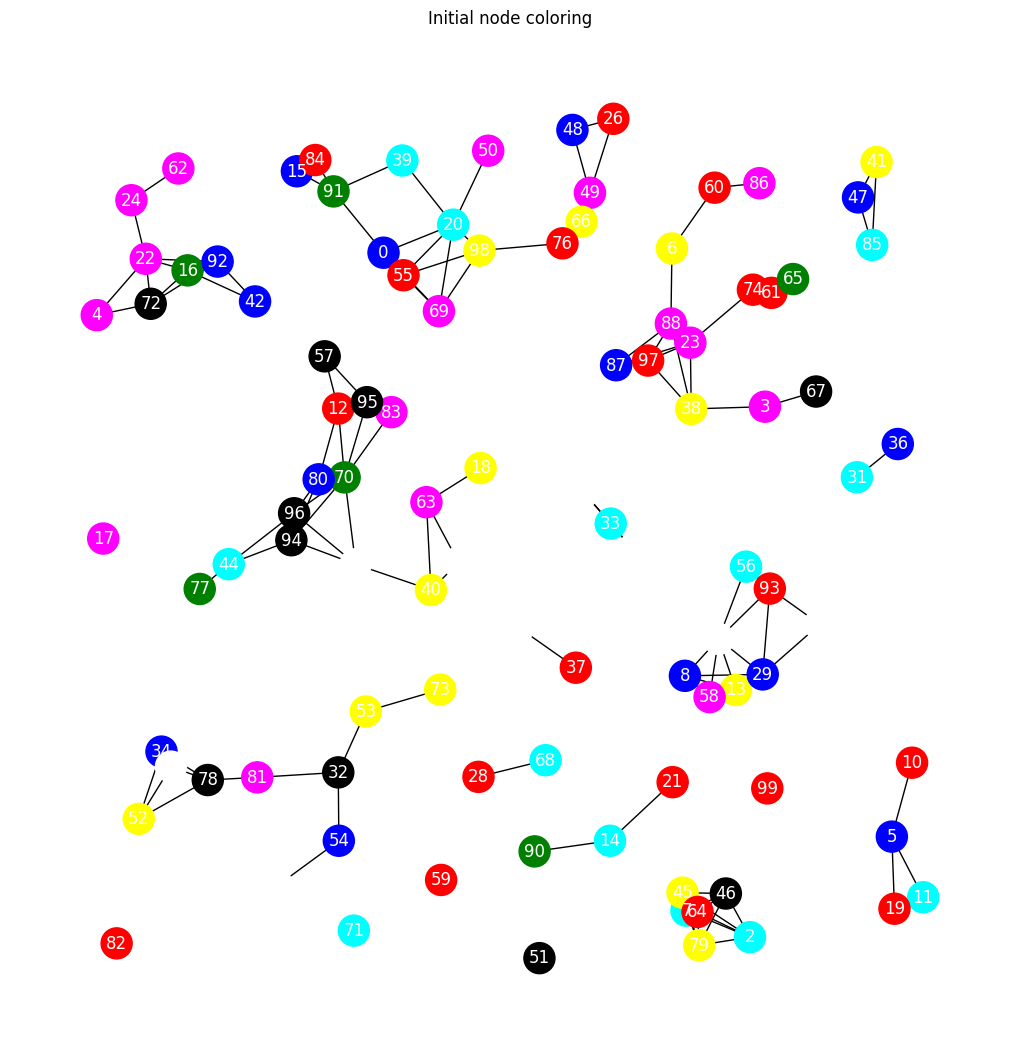

In [155]:
#Initial image
plt.figure(figsize=(10, 10))
pos = {i: (routers_coordinates[i, 0], routers_coordinates[i, 1]) for i in range(G1.number_of_nodes())}
node_colors = [G1.nodes[node]['state'] for node in G1.nodes]
nx.draw(G1, pos, with_labels=True, node_color=node_colors, node_size=500, font_color='white')
plt.title('Initial node coloring')
plt.show()

In [180]:
#Cost function
def cost(s,X_j):
    
    if X_j==s: 
        cost=2
    elif(abs(X_j-s)==1):
        cost=1
    else: 
        cost=0
    return cost

#Probabilities function

def probabilities(n, i,a,C):
     numerator= np.exp(-n*sum(G1[i][j]['weight']*cost(C[a], C[G1.nodes[j]['state']]) for j in G1.neighbors(i)))
     denominator= sum(np.exp(-n*sum(G1[i][j]['weight']*cost(C[s],C[ G1.nodes[j]["state"]]) for j in G1.neighbors(i))) for s in C.keys())
     return numerator/denominator

#Utility function
def utility(G1):
    return 1/2*sum(G1[i][j]["weight"]*cost(C[G1.nodes[i]["state"]], C[G1.nodes[j]["state"]]) for i,j in G1.edges())

In [174]:
t=1000
def bands(t):
    n=t/50
    U=[]
    for i in range(1,t+1): 
        #Choose a random node
        node=rn.choice(list(G1.nodes))
        print("The chosen node is ", node, "with color ", G1.nodes[node]["state"])

        #Calculate the probabilities
        p_red = probabilities(n, node, colors[0],C)
        p_green = probabilities(n, node, colors[1],C)
        p_blue = probabilities(n, node, colors[2],C)
        p_yellow = probabilities(n, node, colors[3],C)
        p_magenta = probabilities(n, node, colors[4],C)
        p_cyan = probabilities(n, node, colors[5],C)
        p_white = probabilities(n, node, colors[6],C)
        p_black = probabilities(n, node, colors[7],C)

        #Choose the biggest probability and update the color
        probs=[p_red, p_green, p_blue, p_yellow, p_magenta, p_cyan, p_white, p_black]
        print(np.argmax(probs))
        G1.nodes[node]["state"]=colors[np.argmax(probs)]
        print(" The node ", node, " is now", G1.nodes[node]["state"])

        U.append(utility(G1))
        
     # Plot the potential function over time
    plt.plot(range(1, t + 1), U)
    plt.xlabel('Time step')
    plt.ylabel('Potential function U(t)')
    plt.title('Potential function over time')
    plt.show()
          

The chosen node is  74 with color  red
red
1
green
2
blue
3
yellow
4
magenta
5
cyan
6
white
7
black
8
6
 The node  74  is now white
The chosen node is  9 with color  white
red
1
green
2
blue
3
yellow
4
magenta
5
cyan
6
white
7
black
8
0
 The node  9  is now red
The chosen node is  0 with color  blue
red
1
green
2
blue
3
yellow
4
magenta
5
cyan
6
white
7
black
8
7
 The node  0  is now black
The chosen node is  63 with color  magenta
red
1
green
2
blue
3
yellow
4
magenta
5
cyan
6
white
7
black
8
5
 The node  63  is now cyan
The chosen node is  37 with color  red
red
1
green
2
blue
3
yellow
4
magenta
5
cyan
6
white
7
black
8
0
 The node  37  is now red
The chosen node is  88 with color  magenta
red
1
green
2
blue
3
yellow
4
magenta
5
cyan
6
white
7
black
8
6
 The node  88  is now white
The chosen node is  68 with color  cyan
red
1
green
2
blue
3
yellow
4
magenta
5
cyan
6
white
7
black
8
2
 The node  68  is now blue
The chosen node is  64 with color  red
red
1
green
2
blue
3
yellow
4
magen

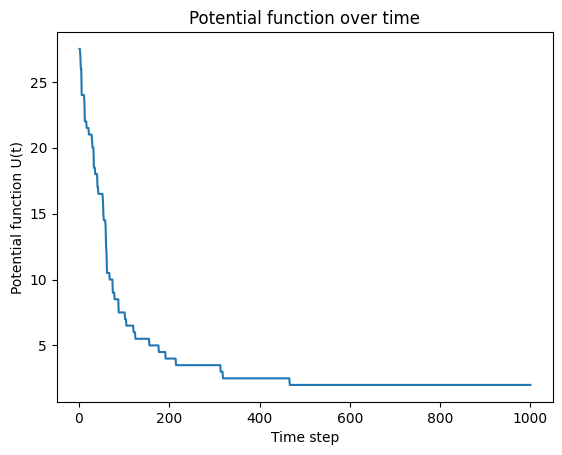

In [175]:
bands(1000)

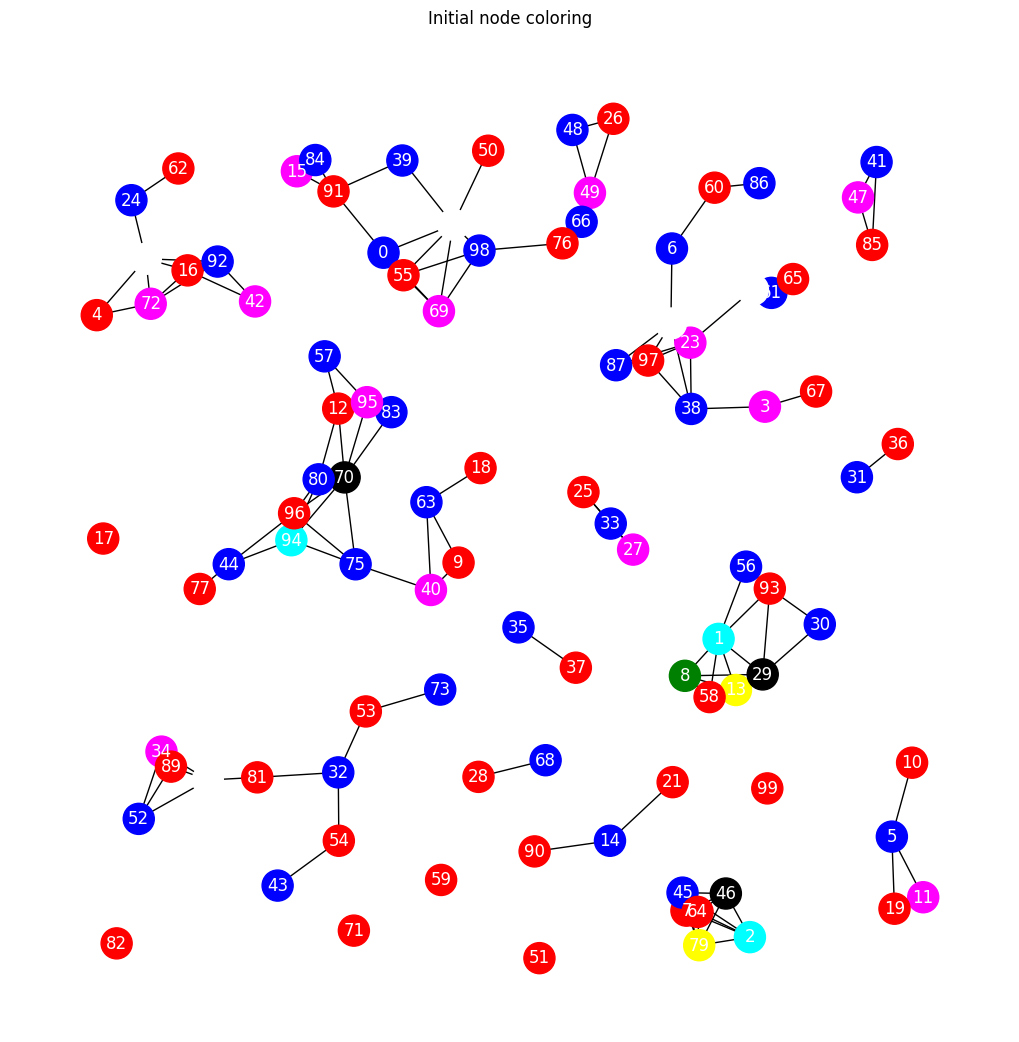

In [181]:
plt.figure(figsize=(10, 10))
pos = {i: (routers_coordinates[i, 0], routers_coordinates[i, 1]) for i in range(G1.number_of_nodes())}
node_colors = [G1.nodes[node]['state'] for node in G1.nodes]
nx.draw(G1, pos, with_labels=True, node_color=node_colors, node_size=500, font_color='white')
plt.title('Initial node coloring')
plt.show()